In [1]:
import torch
import torch.nn as nn
from torch import sigmoid
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(0)

In [0]:
def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

In [0]:
class Net(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)
    self.a1 = None
    self.l1 = None
    self.l2 = None
  
  def forward(self, x):
    self.l1 = self.linear1(x)
    self.a1 = sigmoid(self.l1)
    self.l2 = self.linear2(self.a1)
    yhat = sigmoid(self.linear2(self.a1))
    return yhat

In [0]:
def train(Y, X, model, optimizer, criterion, epochs=1000):
  cost =[]
  total = 0
  for epoch in range(epochs):
    total = 0
    for y, x in zip(Y, X):
      yhat = model(x)
      loss = criterion(yhat, y)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      total += loss.item()
    cost.append(total)
    if epoch % 300 ==0:
      PlotStuff(X, Y, model, epoch, leg=True)
      plt.show()
      model(X)
      plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:,1], c=Y.numpy().reshape(-1))
      plt.title('activations')
      plt.show()
  return cost


In [0]:
X = torch.arange(-20,20,1).view(-1,1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:,0]>-4) & (X[:,0]<4)]=1.0

In [0]:
def criterion_cross(outputs, labels):
  out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
  return out

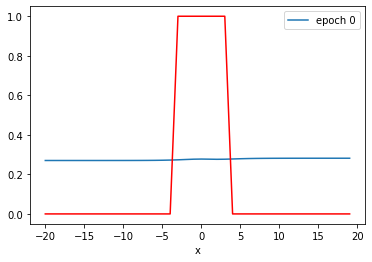

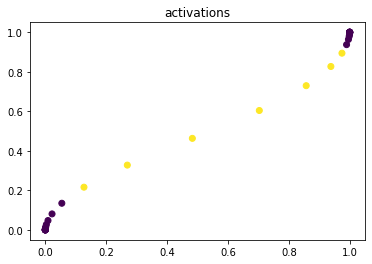

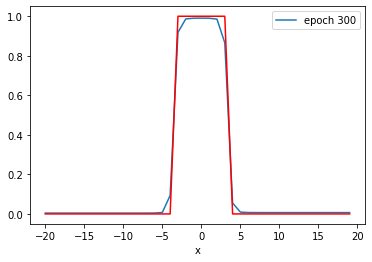

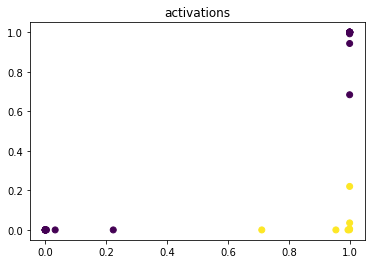

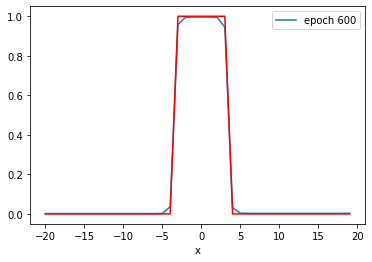

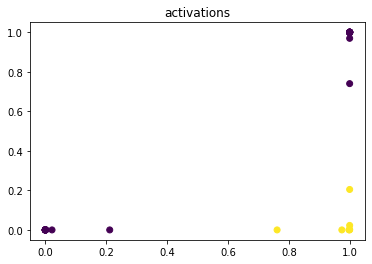

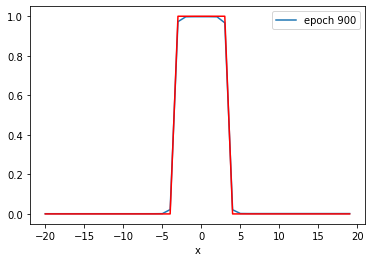

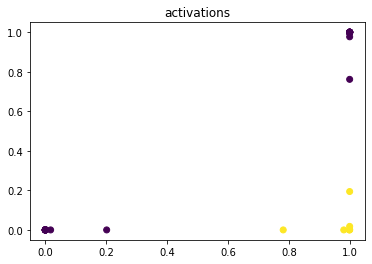

Text(0.5, 1.0, 'cross entropy loss')

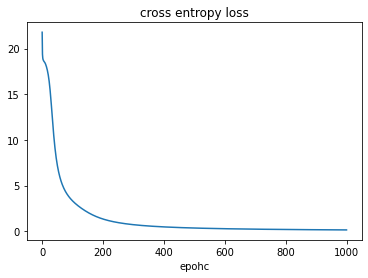

In [26]:
D_in = 1
H=2
D_out = 1
learning_rate = 0.1
model = Net(D_in, H, D_out)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
plt.plot(cost_cross)
plt.xlabel('epohc')
plt.title('cross entropy loss')

In [27]:
x = torch.tensor([0.0])
yhat = model(x)
yhat

tensor([0.9980], grad_fn=<SigmoidBackward>)

In [28]:
X_=torch.tensor([[0.0],[2.0],[3.0]])
Yhat = model(X_)
Yhat

tensor([[0.9980],
        [0.9975],
        [0.9707]], grad_fn=<SigmoidBackward>)

In [29]:
Yhat = Yhat>0.5
Yhat

tensor([[True],
        [True],
        [True]])

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


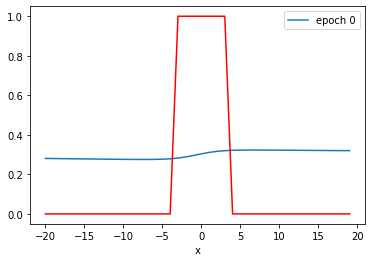

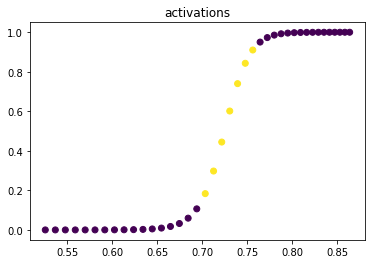

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


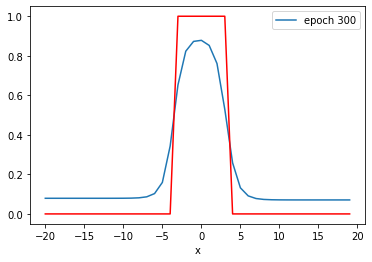

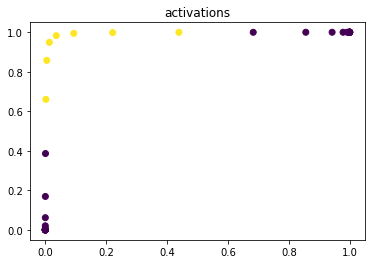

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


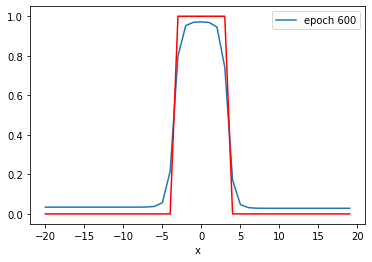

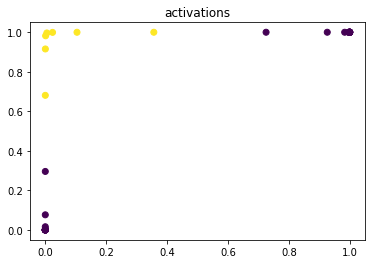

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


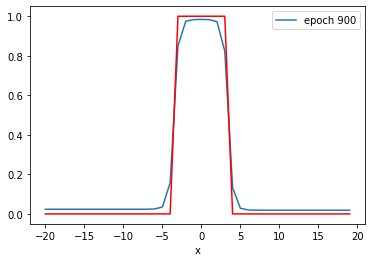

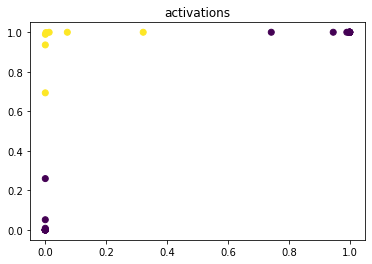

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Text(0.5, 1.0, 'MSE loss')

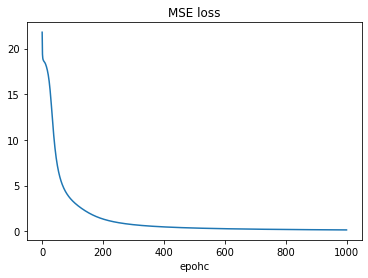

In [31]:
learning_rate = 0.1
criterion_MSE = nn.MSELoss()
model = Net(D_in, H, D_out)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train(Y, X, model, optimizer, criterion_MSE, epochs=1000)
plt.plot(cost_cross)
plt.xlabel('epohc')
plt.title('MSE loss')